In [1]:
#import necessary packages used for manipulating operations on image
#cv2 for reading and displaying, writing image
#numpy for manipulating image as image is matrix of pixel values
#skimage is package which provides many methods which help to transform image

In [2]:
import cv2
import numpy as np
from skimage import io 
from skimage.transform import rotate, AffineTransform, warp
import matplotlib.pyplot as plt
import random
from skimage import img_as_ubyte
import os
from skimage.util import random_noise

In [3]:
#Lets define functions for each operation
def anticlockwise_rotation(image):
    angle= random.randint(0,180)
    return rotate(image, angle)

def clockwise_rotation(image):
    angle= random.randint(0,180)
    return rotate(image, -angle)

def h_flip(image):
    return  np.fliplr(image)

def v_flip(image):
    return np.flipud(image)

def add_noise(image):
    return random_noise(image)

def blur_image(image):
    return cv2.GaussianBlur(image, (9,9),0)

#I would not recommend warp_shifting, because it distorts image, but can be used in many use case like 
#classifying blur and non-blur images
def warp_shift(image): 
    transform = AffineTransform(translation=(0,40))  #chose x,y values according to your convinience
    warp_image = warp(image, transform, mode="wrap")
    return warp_image

In [4]:
transformations = {'rotate anticlockwise': anticlockwise_rotation,
                    'rotate clockwise': clockwise_rotation,
                    'horizontal flip': h_flip, 
                    'vertical flip': v_flip,
                    'warp shift': warp_shift,
                    'adding noise': add_noise,
                    'blurring image':blur_image
                  }                #use dictionary to store names of functions 

images_path="/home/kiranadam/Images-master/Image_Collection_Color" #path to original images
augmented_path="/home/kiranadam/Images-master/Augmented_Images" # path to store aumented images
images=[] # to store paths of images from folder

for im in os.listdir(images_path):  # read image name from folder and append its path into "images" array     
    images.append(os.path.join(images_path,im))

images_to_generate=20  #you can change this value according to your requirement
i=1                        # variable to iterate till images_to_generate

while i<=images_to_generate:    
    image=random.choice(images)
    #print(image)
    original_image = io.imread(image)
    transformed_image=None
#     print(i)
    n = 0       #variable to iterate till number of transformation to apply
    transformation_count = random.randint(1, len(transformations)) #choose random number of transformation to apply on the image
    
    while n <= transformation_count:
        key = random.choice(list(transformations)) #randomly choosing method to call
        transformed_image = transformations[key](original_image)
        n = n + 1
        
    new_image_path= "%s/augmented_image_%s.jpg" %(augmented_path, i)
    transformed_image = img_as_ubyte(transformed_image)  #Convert an image to unsigned byte format, with values in [0, 255].
    transformed_image=cv2.cvtColor(transformed_image, cv2.COLOR_BGR2RGB) #convert image to RGB before saving it
    cv2.imwrite(new_image_path, transformed_image) # save transformed image to path
    i =i+1
#to generate more images, put above 3 statement inside while n<... loop

In [5]:
#hooray! you have created 2000 images from 289 images
#you can create more than 2000 using 289 images.

In [6]:
#alpha

img = cv2.imread("/home/kiranadam/Images-master/lena.jpeg")

b_channel, g_channel, r_channel = cv2.split(img)

alpha_channel = np.ones(b_channel.shape, dtype=b_channel.dtype) * 255
#minimum is 0
alpha_channel[:, :] = 128

img_BGRA = cv2.merge((b_channel, g_channel, r_channel, alpha_channel))

cv2.imwrite("lena.png", img_BGRA)



True

Original:


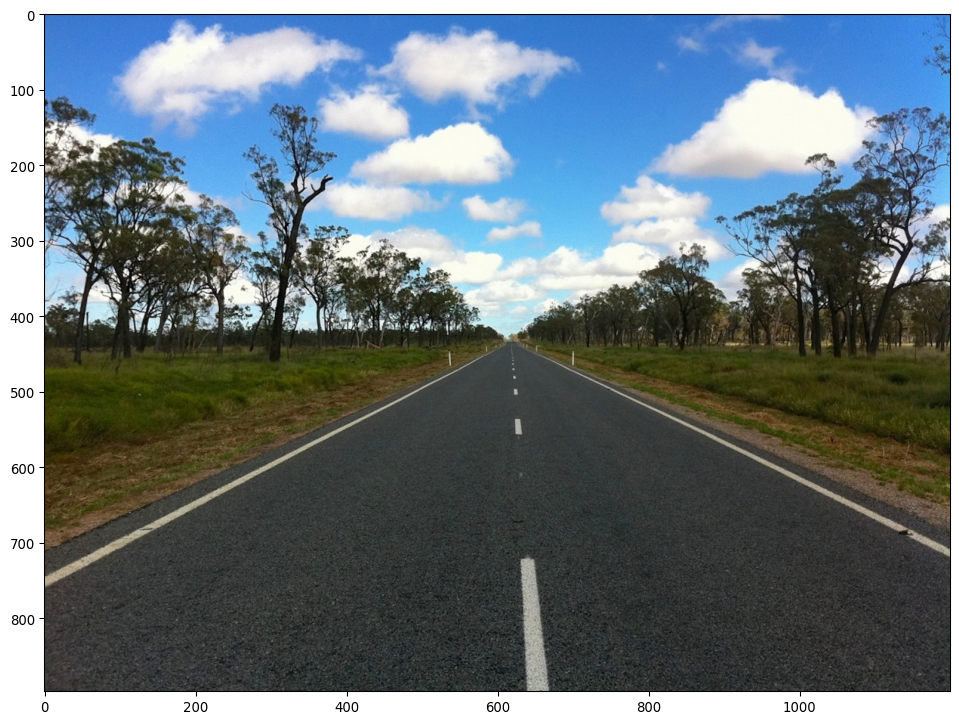

In [7]:
import imgaug as ia
import imgaug.augmenters as iaa
import imageio
%matplotlib inline

image = imageio.imread("land.jpeg")

print("Original:")
ia.imshow(image)


In [8]:
def add_brightness(image):
        image_HLS = cv2.cvtColor(image,cv2.COLOR_RGB2HLS) ## Conversion to HLS    
        image_HLS = np.array(image_HLS, dtype = np.float64)     
        random_brightness_coefficient = np.random.uniform()+0.5 ## generates value between 0.5 and 1.5    
        image_HLS[:,:,1] = image_HLS[:,:,1]*random_brightness_coefficient ## scale pixel values up or down for channel 1(Lightness)    
        image_HLS[:,:,1][image_HLS[:,:,1]>255]  = 255 ##Sets all values above 255 to 255    
        image_HLS = np.array(image_HLS, dtype = np.uint8)    
        image_RGB = cv2.cvtColor(image_HLS,cv2.COLOR_HLS2RGB) ## Conversion to RGB    
        return image_RGB

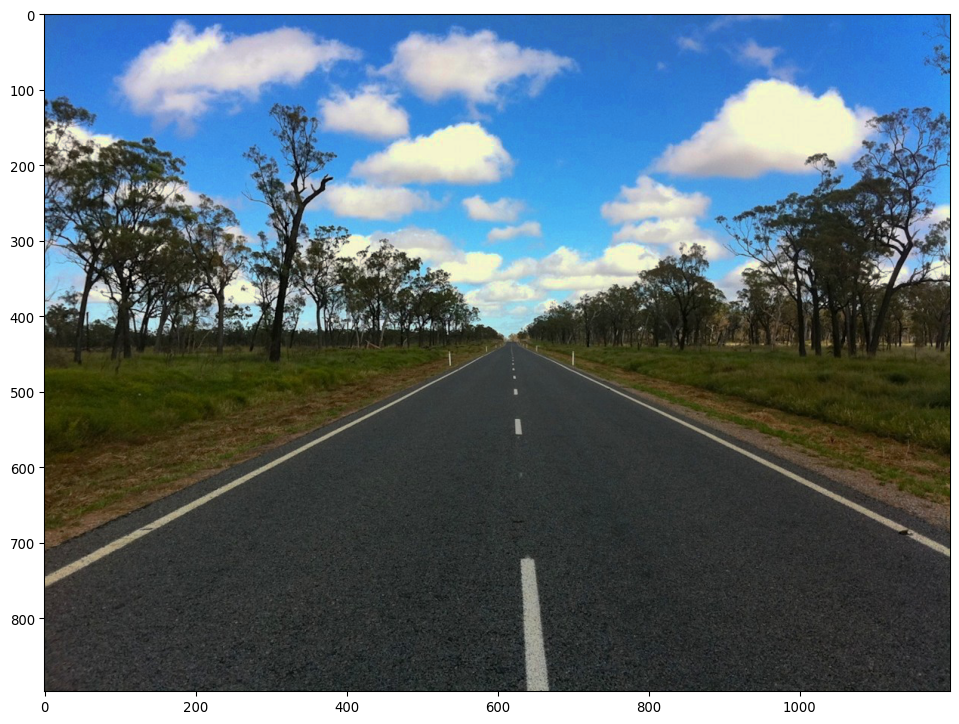

In [9]:
img_RGB = add_brightness(image)
ia.imshow(img_RGB)

In [10]:
def add_snow(image):    
        image_HLS = cv2.cvtColor(image,cv2.COLOR_RGB2HLS) ## Conversion to HLS    
        image_HLS = np.array(image_HLS, dtype = np.float64)     
        brightness_coefficient = 2.5     
        snow_point=140 ## increase this for more snow    
        image_HLS[:,:,1][image_HLS[:,:,1]<snow_point] = image_HLS[:,:,1][image_HLS[:,:,1]<snow_point]*brightness_coefficient ## scale pixel values up for channel 1(Lightness)    
        image_HLS[:,:,1][image_HLS[:,:,1]>255]  = 255 ##Sets all values above 255 to 255    
        image_HLS = np.array(image_HLS, dtype = np.uint8)    
        image_RGB = cv2.cvtColor(image_HLS,cv2.COLOR_HLS2RGB) ## Conversion to RGB    
        return image_RGB

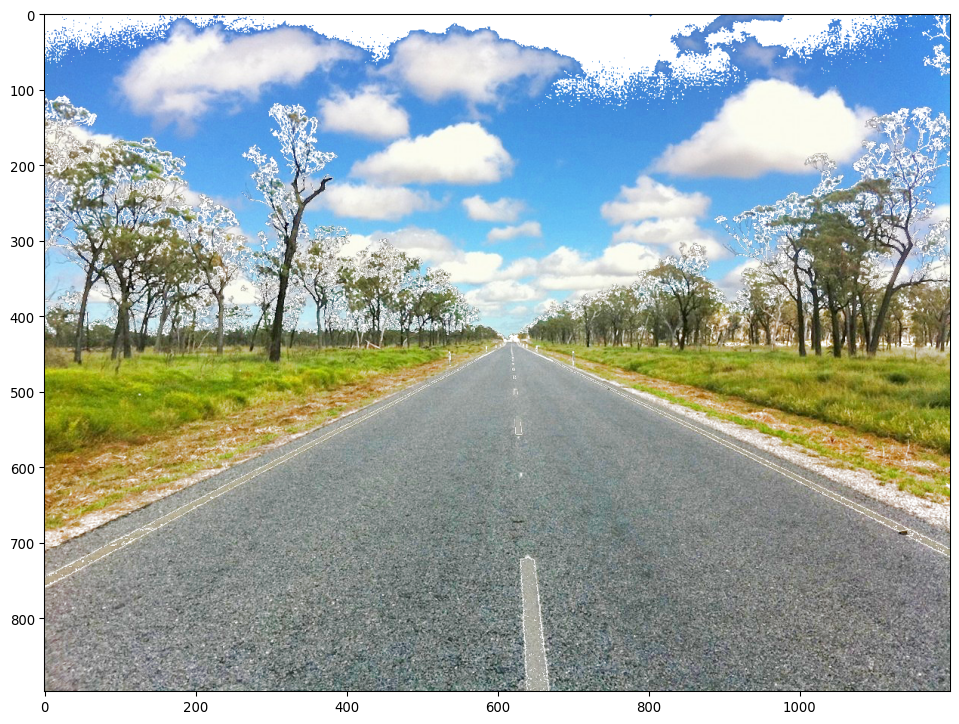

In [11]:
img_RGB = add_snow(image)
ia.imshow(img_RGB)

In [12]:
#Rain effect
def generate_random_lines(imshape,slant,drop_length):    
    drops=[]    
    for i in range(1500): ## If You want heavy rain, try increasing this        
        if slant<0:            
            x= np.random.randint(slant,imshape[1])       
        else:            
            x= np.random.randint(0,imshape[1]-slant)        
            y= np.random.randint(0,imshape[0]-drop_length)        
        drops.append((x,y))    
    return drops 



In [13]:
def add_rain(image):        
    imshape = image.shape    
    slant_extreme=10    
    slant= np.random.randint(-slant_extreme,slant_extreme)     
    drop_length=20    
    drop_width=2    
    drop_color=(200,200,200) ## a shade of gray    
    rain_drops= generate_random_lines(imshape,slant,drop_length)        
    for rain_drop in rain_drops:        
        cv2.line(image,(rain_drop[0],rain_drop[1]),(rain_drop[0]+slant,rain_drop[1]+drop_length),drop_color,drop_width)    
        image= cv2.blur(image,(3,3)) ## rainy view are blurry        
        brightness_coefficient = 0.8 ## rainy days are usually shady     
        image_HLS = cv2.cvtColor(image,cv2.COLOR_RGB2HLS) ## Conversion to HLS    
        image_HLS[:,:,1] = image_HLS[:,:,1]*brightness_coefficient ## scale pixel values down for channel 1(Lightness)    
        image_RGB = cv2.cvtColor(image_HLS,cv2.COLOR_HLS2RGB) ## Conversion to RGB    
    return image_RGB

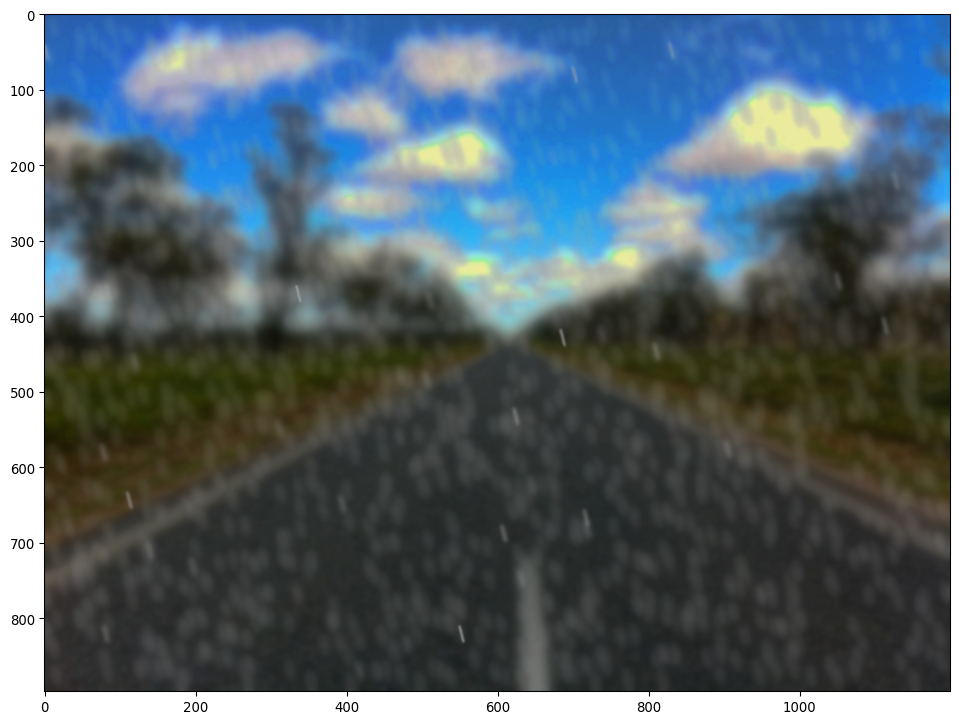

In [14]:
img_RGB = add_rain(image)
ia.imshow(img_RGB)

In [15]:
def add_blur(image, x,y,hw):    
    image[y:y+hw, x:x+hw,1] = image[y:y+hw, x:x+hw,1]+1    
    image[:,:,1][image[:,:,1]>255]  = 255 ##Sets all values above 255 to 255        
    image[y:y+hw, x:x+hw,1] = cv2.blur(image[y:y+hw, x:x+hw,1] ,(10,10)) 
    
    return image

In [16]:
def generate_random_blur_coordinates(imshape,hw):    
    blur_points=[]    
    midx= imshape[1]//2-hw-100    
    midy= imshape[0]//2-hw-100    
    index=1    
    while(midx>-10 or midy>-10): ## radially generating coordinates        
        for i in range(250*index):            
            x= np.random.randint(midx,imshape[1]-midx-hw)            
            y= np.random.randint(midy,imshape[0]-midy-hw)            
            blur_points.append((x,y))        
        midx-=250*imshape[1]//sum(imshape)        
        midy-=250*imshape[0]//sum(imshape)        
        index+=1    
    return blur_points    


In [17]:
def add_fog(image):    
    image_HLS = cv2.cvtColor(image,cv2.COLOR_RGB2HLS) ## Conversion to HLS    
    mask = np.zeros_like(image)     
    imshape = image.shape    
    hw=100    
    image_HLS[:,:,1]=image_HLS[:,:,1]*0.8    
    haze_list= generate_random_blur_coordinates(imshape,hw)
    
    for haze_points in haze_list:         
        image_HLS[:,:,1][image_HLS[:,:,1]>255]  = 255 ##Sets all values above 255 to 255        
        image_HLS= add_blur(image_HLS, haze_points[0],haze_points[1], hw) ## adding all shadow polygons on empty mask, single 255 denotes only red channel    
    image_RGB = cv2.cvtColor(image_HLS,cv2.COLOR_HLS2RGB) ## Conversion to RGB    
    
    return image_RGB

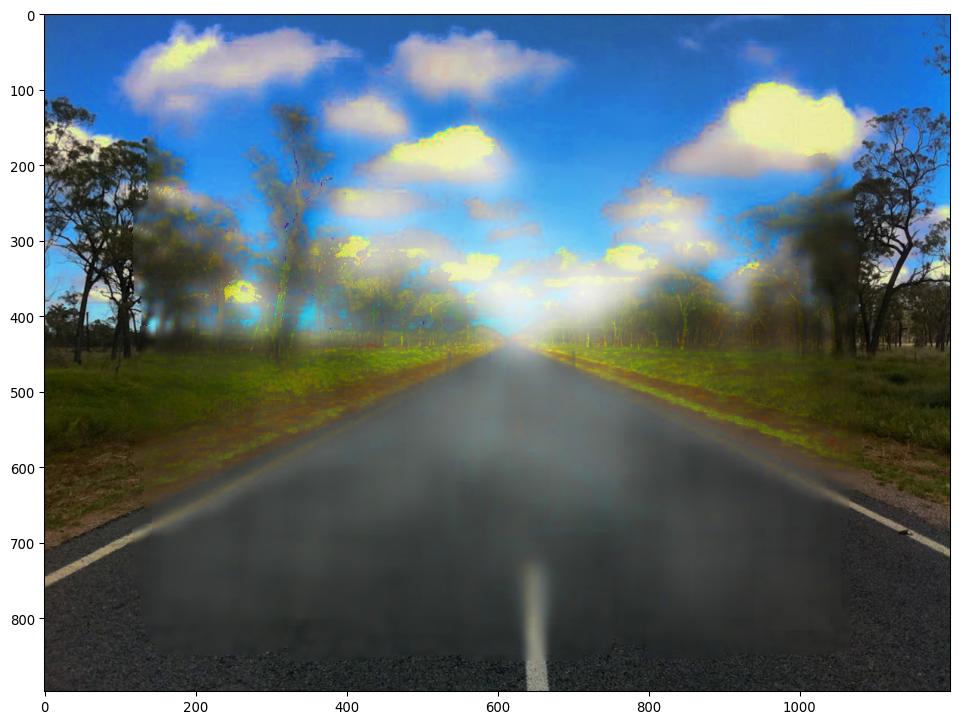

In [18]:
img_RGB = add_fog(image)
ia.imshow(img_RGB)